This Notebook is to be worked on After the Final Presentation to add additional EDA thoughts

#### Import libraries into the project

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using the pandas read_csv() method, read the US Census dataset into the notebook as a DataFrame. Some rows  of data may be required to be filtered

In [59]:
pop_2000 =pd.read_csv('../data/Population/nst-est2010-01.csv')
pop_2000.head(10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,Population Estimates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-Apr-00,NaN
2,NaN,1-Jul-10,1-Jul-09,1-Jul-08,1-Jul-07,1-Jul-06,1-Jul-05,1-Jul-04,1-Jul-03,1-Jul-02,1-Jul-01,1-Jul-00,Estimates Base,Census
3,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844","281,424,600","281,421,906"
4,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333","53,594,810","53,594,378"
5,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889","64,396,653","64,392,776"
6,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291","100,234,523","100,236,820"
7,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331","63,198,614","63,197,932"
8,.Alabama,"4,729,656","4,707,496","4,673,889","4,634,063","4,594,911","4,542,912","4,510,588","4,489,876","4,471,462","4,463,343","4,451,497","4,447,207","4,447,100"
9,.Alaska,"708,862","694,690","685,532","679,893","675,322","667,114","659,305","647,671","641,974","633,538","627,748","626,933","626,932"


The pop_2000 df requires several clean up items that will be performed
 - Drop existing Headers containing `Unamed:`
 - Drop Rows Header 0, 1 which contains `Nan` 
 - Drop Rows after the Last listed US state of Wyoming
 - Adding a header to Column 0 on to Row Index 2 of `Geographic Area`
 - After Reviewing of the data columns, Column 12 contains `Estimates Base` and Column 13 `Census` which are factored in Column 11 for the `1-Jul-00` population estimates.
 - Drop Column 12 & 13.

In [60]:
##### header = 3 options takes care of dropping the row headers, nrows filters the number of rows being read into the dataframe
#index_col=[0] removes the index. It will be inserted later when we Rename the column[0]
pop_2000 =pd.read_csv('../data/Population/nst-est2010-01.csv',header=3, nrows=56, index_col=[0])
# Rename the Header for first column
pop_2000.reset_index(inplace=True)
pop_2000.rename(columns={'index':'Geographic Area'}, inplace=True)
#Drop column 12 & 13
pop_2000.drop(pop_2000.iloc[:,12:14], axis =1, inplace=True)


pop_2000

,Geographic Area,1-Jul-10,1-Jul-09,1-Jul-08,1-Jul-07,1-Jul-06,1-Jul-05,1-Jul-04,1-Jul-03,1-Jul-02,1-Jul-01,1-Jul-00
0,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844"
1,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333"
2,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889"
3,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291"
4,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331"
5,.Alabama,"4,729,656","4,707,496","4,673,889","4,634,063","4,594,911","4,542,912","4,510,588","4,489,876","4,471,462","4,463,343","4,451,497"
6,.Alaska,"708,862","694,690","685,532","679,893","675,322","667,114","659,305","647,671","641,974","633,538","627,748"
7,.Arizona,"6,676,627","6,587,653","6,499,207","6,360,238","6,190,987","5,973,970","5,758,692","5,590,820","5,451,472","5,303,869","5,166,304"
8,.Arkansas,"2,910,236","2,887,331","2,867,099","2,841,595","2,814,910","2,776,257","2,746,215","2,722,804","2,704,471","2,690,743","2,678,115"
9,.California,"37,266,600","36,887,615","36,538,008","36,185,908","35,947,461","35,770,688","35,538,256","35,236,589","34,867,773","34,481,753","33,994,383"


In [61]:
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   1-Jul-10         56 non-null     object
 2   1-Jul-09         56 non-null     object
 3   1-Jul-08         56 non-null     object
 4   1-Jul-07         56 non-null     object
 5   1-Jul-06         56 non-null     object
 6   1-Jul-05         56 non-null     object
 7   1-Jul-04         56 non-null     object
 8   1-Jul-03         56 non-null     object
 9   1-Jul-02         56 non-null     object
 10  1-Jul-01         56 non-null     object
 11  1-Jul-00         56 non-null     object
dtypes: object(12)
memory usage: 5.4+ KB


In [62]:
pop_2000.rename(columns={'1-Jul-10':'2010',
                         '1-Jul-09':'2009',
                         '1-Jul-08':'2008',
                         '1-Jul-07':'2007',
                         '1-Jul-06':'2006',
                         '1-Jul-05':'2005',
                         '1-Jul-04':'2004',
                         '1-Jul-03':'2003',
                         '1-Jul-02':'2002',
                         '1-Jul-01':'2001',
                         '1-Jul-00':'2000'
                        },inplace=True)
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   2010             56 non-null     object
 2   2009             56 non-null     object
 3   2008             56 non-null     object
 4   2007             56 non-null     object
 5   2006             56 non-null     object
 6   2005             56 non-null     object
 7   2004             56 non-null     object
 8   2003             56 non-null     object
 9   2002             56 non-null     object
 10  2001             56 non-null     object
 11  2000             56 non-null     object
dtypes: object(12)
memory usage: 5.4+ KB


In [63]:
pop_2000.head()

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844"
1,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333"
2,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889"
3,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291"
4,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331"


In [64]:
#Change the data type to Integers instead of objects
pop_years = ['2010','2009','2008','2007',
            '2006','2005','2004','2003',
            '2002','2001','2000']
#We go into the dataframe for the above years and drop the , so we can coerse it for int data type
for year in pop_years:
    pop_2000[year]= pop_2000[year].str.replace(',','',regex=False)

# Below line changes all the population data in year columsn to integers
pop_2000[pop_years]=pop_2000[pop_years].apply(pd.to_numeric, errors='coerce', axis=1)

pop_2000.head()

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,309050816,306656290,304177401,301393632,298431771,295618454,292936109,290242027,287745630,285049647,282165844
1,Northeast,55417311,55242435,55049539,54868196,54698799,54595246,54516501,54378581,54163808,53922845,53663333
2,Midwest,66972887,66770813,66572128,66344701,66066820,65801226,65586267,65335106,65069187,64807870,64491889
3,South,114404435,113185196,111929667,110479851,108852101,107332739,105804145,104353923,103151318,101856689,100559291
4,West,72256183,71457846,70626067,69700884,68814051,67889243,67029196,66174417,65361317,64462243,63451331


In [65]:
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   2010             56 non-null     int64 
 2   2009             56 non-null     int64 
 3   2008             56 non-null     int64 
 4   2007             56 non-null     int64 
 5   2006             56 non-null     int64 
 6   2005             56 non-null     int64 
 7   2004             56 non-null     int64 
 8   2003             56 non-null     int64 
 9   2002             56 non-null     int64 
 10  2001             56 non-null     int64 
 11  2000             56 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 5.4+ KB


In [66]:
# Strip the . in the name of the State
#in the future add the regex statement
pop_2000['Geographic Area']=pop_2000['Geographic Area'].str.replace('.','',regex=False)
pop_2000

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,309050816,306656290,304177401,301393632,298431771,295618454,292936109,290242027,287745630,285049647,282165844
1,Northeast,55417311,55242435,55049539,54868196,54698799,54595246,54516501,54378581,54163808,53922845,53663333
2,Midwest,66972887,66770813,66572128,66344701,66066820,65801226,65586267,65335106,65069187,64807870,64491889
3,South,114404435,113185196,111929667,110479851,108852101,107332739,105804145,104353923,103151318,101856689,100559291
4,West,72256183,71457846,70626067,69700884,68814051,67889243,67029196,66174417,65361317,64462243,63451331
5,Alabama,4729656,4707496,4673889,4634063,4594911,4542912,4510588,4489876,4471462,4463343,4451497
6,Alaska,708862,694690,685532,679893,675322,667114,659305,647671,641974,633538,627748
7,Arizona,6676627,6587653,6499207,6360238,6190987,5973970,5758692,5590820,5451472,5303869,5166304
8,Arkansas,2910236,2887331,2867099,2841595,2814910,2776257,2746215,2722804,2704471,2690743,2678115
9,California,37266600,36887615,36538008,36185908,35947461,35770688,35538256,35236589,34867773,34481753,33994383


#### Save the file as CSV

In [67]:
#pop_2000.to_csv(r'../clean_data_source/pop_2000_2010.csv', index = False)

#### Using the pandas read_csv() method, read the US Census dataset from 2010- 2020 into the notebook as a DataFrame. Some rows  of data may be required to be filtered

In [68]:
census_2020 = pd.read_excel('..\data\Population\population-2020.xlsx',skiprows = 2, sheet_name = 1)
census_2020.rename(columns={'Area':'Geographic Area','Resident Population 2020 Census':'2020'}, inplace=True)
census_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   2020             52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [69]:
##### header = 3 options takes care of dropping the row headers, nrows filters the number of rows being read into the dataframe
#index_col=[0] removes the index. It will be inserted later when we Rename the column[0]
pop_2020 =pd.read_csv('../data/Population/nst-est2019-01.csv', nrows=56)
pop_2020.info()
pop_2020 = pop_2020[['NAME','POPESTIMATE2010','POPESTIMATE2011',
                     'POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
                    'POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017',
                    'POPESTIMATE2018','POPESTIMATE2019']]
pop_2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             56 non-null     int64  
 1   REGION             56 non-null     int64  
 2   DIVISION           56 non-null     int64  
 3   STATE              56 non-null     int64  
 4   NAME               56 non-null     object 
 5   ESTIMATESBASE2010  56 non-null     int64  
 6   POPESTIMATE2010    56 non-null     int64  
 7   POPESTIMATE2011    56 non-null     int64  
 8   POPESTIMATE2012    56 non-null     int64  
 9   POPESTIMATE2013    56 non-null     int64  
 10  POPESTIMATE2014    56 non-null     int64  
 11  POPESTIMATE2015    56 non-null     int64  
 12  POPESTIMATE2016    56 non-null     int64  
 13  POPESTIMATE2017    56 non-null     int64  
 14  POPESTIMATE2018    56 non-null     int64  
 15  POPESTIMATE2019    56 non-null     int64  
 16  NPOPCHG_2010       56 non-nu

,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


In [70]:
# Select the relative columns required for the purposes of this project
pop_2020.columns = ['Geographic Area','2010','2011','2012',
                              '2013','2014','2015','2016','2017',
                              '2018','2019']
pop_2020

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


In [71]:
pop_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   2010             56 non-null     int64 
 2   2011             56 non-null     int64 
 3   2012             56 non-null     int64 
 4   2013             56 non-null     int64 
 5   2014             56 non-null     int64 
 6   2015             56 non-null     int64 
 7   2016             56 non-null     int64 
 8   2017             56 non-null     int64 
 9   2018             56 non-null     int64 
 10  2019             56 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.9+ KB


In [72]:
inc_2020 = pd.merge(pop_2020,census_2020, on='Geographic Area', how='left')
pop_2020 = inc_2020
inc_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  56 non-null     object 
 1   2010             56 non-null     int64  
 2   2011             56 non-null     int64  
 3   2012             56 non-null     int64  
 4   2013             56 non-null     int64  
 5   2014             56 non-null     int64  
 6   2015             56 non-null     int64  
 7   2016             56 non-null     int64  
 8   2017             56 non-null     int64  
 9   2018             56 non-null     int64  
 10  2019             56 non-null     int64  
 11  2020             52 non-null     float64
dtypes: float64(1), int64(10), object(1)
memory usage: 5.7+ KB


#### Save the file as CSV

In [73]:
#pop_2020.to_csv(r'../clean_data_source/pop_2010_2019.csv', index = False)

Merge the final Population across all 20 years

In [74]:
pop_2000A = pop_2000[pop_2000.columns[::-1]]
pop_2000B = pop_2000A.drop(['2010'],axis=1)
# shift column 'Geographic Area' to first position
first_column = pop_2000B.pop('Geographic Area')
  
# insert column using insert(position,column_name,first_column) function
pop_2000B.insert(0, 'Geographic Area', first_column)

#Finally Merge the entire population data set
population = pd.merge(pop_2000B, pop_2020, how='left', on='Geographic Area')
# Save the File Externally
#population.to_csv(r'../clean_data_source/merged_population.csv', index = False)
population

,Geographic Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,282165844,285049647,287745630,290242027,292936109,295618454,298431771,301393632,304177401,...,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0,331449281.0
1,Northeast,53663333,53922845,54163808,54378581,54516501,54595246,54698799,54868196,55049539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Midwest,64491889,64807870,65069187,65335106,65586267,65801226,66066820,66344701,66572128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South,100559291,101856689,103151318,104353923,105804145,107332739,108852101,110479851,111929667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,West,63451331,64462243,65361317,66174417,67029196,67889243,68814051,69700884,70626067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,4451497,4463343,4471462,4489876,4510588,4542912,4594911,4634063,4673889,...,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,5024279.0
6,Alaska,627748,633538,641974,647671,659305,667114,675322,679893,685532,...,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,733391.0
7,Arizona,5166304,5303869,5451472,5590820,5758692,5973970,6190987,6360238,6499207,...,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,7151502.0
8,Arkansas,2678115,2690743,2704471,2722804,2746215,2776257,2814910,2841595,2867099,...,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,3011524.0
9,California,33994383,34481753,34867773,35236589,35538256,35770688,35947461,36185908,36538008,...,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,39538223.0


### Read in the Insurance Coverage Population

#### Import Uninsured information by State

In [75]:
unins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 2, sheet_name = 1)
#skiprows = 1,,header=[0, 1], ,
unins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
unins_df1.head()

,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000,28566000,28019000,27304000,29758000,36670000,45181000,45615000,46376000,47208000,45665000,43503000
1,Alabama,469000,481000,449000,435000,484000,579000,645000,632000,674000,687000,637000,609000
2,Alaska,86000,90000,98000,101000,106000,122000,132000,145000,141000,137000,143000,126000
3,Arizona,809000,750000,695000,681000,728000,903000,1118000,1131000,1095000,1065000,1127000,1154000
4,Arkansas,271000,244000,232000,232000,278000,343000,465000,476000,492000,501000,483000,480000


In [76]:
unins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   Uninsured_2019   52 non-null     int64 
 2   Uninsured_2018   52 non-null     int64 
 3   Uninsured_2017   52 non-null     int64 
 4   Uninsured_2016   52 non-null     int64 
 5   Uninsured_2015   52 non-null     int64 
 6   Uninsured_2014   52 non-null     int64 
 7   Uninsured_2013   52 non-null     int64 
 8   Uninsured_2012   52 non-null     int64 
 9   Uninsured_2011   52 non-null     int64 
 10  Uninsured_2010   52 non-null     int64 
 11  Uninsured_2009   52 non-null     int64 
 12  Uninsured_2008   52 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 5.4+ KB


In [78]:
uninsured_diff = unins_df1[['Geographic Area','Uninsured_2019','Uninsured_2009']]
uninsured_diff['year_10_diff'] = uninsured_diff['Uninsured_2019']-uninsured_diff['Uninsured_2009']
uninsured_diff

<ipython-input-78-e42577148a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninsured_diff['year_10_diff'] = uninsured_diff['Uninsured_2019']-uninsured_diff['Uninsured_2009']


,Geographic Area,Uninsured_2019,Uninsured_2009,year_10_diff
0,United States,29639000,45665000,-16026000
1,Alabama,469000,637000,-168000
2,Alaska,86000,143000,-57000
3,Arizona,809000,1127000,-318000
4,Arkansas,271000,483000,-212000
5,California,3002000,6559000,-3557000
6,Colorado,453000,778000,-325000
7,Connecticut,207000,305000,-98000
8,Delaware,63000,89000,-26000
9,District of Columbia,25000,41000,-16000


#### The least drop in the Uninsured Population in the Last 10 Years

In [79]:
uninsured_diff.nlargest(6,'year_10_diff')

,Geographic Area,Uninsured_2019,Uninsured_2009,year_10_diff
35,North Dakota,51000,61000,-10000
51,Wyoming,70000,81000,-11000
9,District of Columbia,25000,41000,-16000
42,South Dakota,88000,104000,-16000
46,Vermont,28000,53000,-25000
8,Delaware,63000,89000,-26000


#### The most Drop in the Uninsured Population in the Last 10 Years

In [80]:
uninsured_diff.nsmallest(6,'year_10_diff')

,Geographic Area,Uninsured_2019,Uninsured_2009,year_10_diff
0,United States,29639000,45665000,-16026000
5,California,3002000,6559000,-3557000
33,New York,1007000,2195000,-1188000
10,Florida,2784000,3795000,-1011000
14,Illinois,923000,1694000,-771000
23,Michigan,571000,1203000,-632000


#### Import Privately insured information by State

In [20]:
private_ins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 1, sheet_name = 2)
#private_ins_df1.head()
private_ins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
private_ins_df1

,Geographic Area,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,United States,217812000,217623000,216952000,215859000,213514000,208333000,202391000,201213000,199871000,200269000,203300000,207786000
1,Alabama,3228000,3202000,3205000,3249000,3198000,3132000,3080000,3088000,3061000,3075000,3097000,3170000
2,Alaska,457000,460000,453000,483000,478000,467000,464000,446000,440000,446000,438000,447000
3,Arizona,4490000,4421000,4352000,4246000,4222000,4050000,3904000,3822000,3771000,3811000,3975000,4036000
4,Arkansas,1757000,1787000,1807000,1820000,1793000,1761000,1689000,1699000,1688000,1686000,1697000,1697000
5,California,24913000,24897000,24824000,24428000,24138000,23665000,22694000,22507000,22363000,22327000,22774000,23361000
6,Colorado,4016000,3964000,3862000,3823000,3778000,3672000,3567000,3499000,3489000,3458000,3516000,3517000
7,Connecticut,2440000,2502000,2524000,2536000,2545000,2522000,2504000,2543000,2574000,2606000,2633000,2697000
8,Delaware,678000,673000,697000,670000,664000,655000,637000,636000,628000,627000,630000,641000
9,District of Columbia,506000,488000,479000,459000,466000,440000,438000,432000,430000,415000,400000,406000


In [21]:
private_ins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   2019             52 non-null     int64 
 2   2018             52 non-null     int64 
 3   2017             52 non-null     int64 
 4   2016             52 non-null     int64 
 5   2015             52 non-null     int64 
 6   2014             52 non-null     int64 
 7   2013             52 non-null     int64 
 8   2012             52 non-null     int64 
 9   2011             52 non-null     int64 
 10  2010             52 non-null     int64 
 11  2009             52 non-null     int64 
 12  2008             52 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 5.4+ KB


In [22]:
private_ins_df2 = pd.read_excel('..\data\Insurance\Insurance 1999 to 2009.xls',skiprows = 1, sheet_name = 4)
#private_ins_df1.head()
private_ins_df2.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
#We go into the dataframe for Geographic Area and drop the ':' so we can prepare it for merge
for state in 'Geographic Area':
    private_ins_df2['Geographic Area']= private_ins_df2['Geographic Area'].str.replace(':','',regex=False)
    
private_ins_df2

,Geographic Area,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,201991000,201690000,201167000,200924000,199871000,200891000,201695000,202794000,200721000
1,Alabama,3221000,3107000,3010000,3080000,3048000,3170000,3132000,3157000,3146000
2,Alaska,428000,428000,406000,414000,399000,401000,422000,408000,425000
3,Arizona,3920000,3770000,3614000,3663000,3600000,3591000,3589000,3517000,3334000
4,Arkansas,1710000,1662000,1725000,1694000,1632000,1653000,1698000,1780000,1833000
5,California,22720000,22679000,22550000,22534000,22818000,23094000,22113000,22163000,21933000
6,Colorado,3486000,3392000,3339000,3302000,3157000,3262000,3290000,3265000,3188000
7,Connecticut,2652000,2639000,2679000,2620000,2608000,2638000,2707000,2695000,2811000
8,Delaware,625000,637000,612000,601000,627000,615000,632000,615000,584000
9,District of Columbia,394000,381000,345000,365000,361000,376000,380000,376000,358000


In [23]:
private_ins_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   2007             52 non-null     int64 
 2   2006             52 non-null     int64 
 3   2005             52 non-null     int64 
 4   2004             52 non-null     int64 
 5   2003             52 non-null     int64 
 6   2002             52 non-null     int64 
 7   2001             52 non-null     int64 
 8   2000             52 non-null     int64 
 9   1999             52 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.2+ KB


In [24]:
private_insurance = pd.merge(private_ins_df1,private_ins_df2, on='Geographic Area', how='left')

# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
private_insurance2 = pd.melt(private_insurance, 
                         id_vars='Geographic Area',
                        value_name='Private Insured',
                        var_name='Year')


private_insurance2.to_csv(r'../clean_data_source/private_insurance.csv', index = False)
private_insurance2.head()

,Geographic Area,Year,Private Insured
0,United States,2019,217812000
1,Alabama,2019,3228000
2,Alaska,2019,457000
3,Arizona,2019,4490000
4,Arkansas,2019,1757000


In [25]:
private_insurance2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  1092 non-null   object
 1   Year             1092 non-null   object
 2   Private Insured  1092 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.7+ KB


#### Import Public insured information by State

In [26]:
public_ins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 1, sheet_name = 3)
public_ins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
public_ins_df1.head()

,Geographic Area,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,United States,114315000,114750000,113720000,112688000,109874000,104228000,98173000,96136000,93418000,90375000,85956000,81431000
1,Alabama,1797000,1790000,1812000,1762000,1752000,1694000,1655000,1642000,1562000,1528000,1466000,1401000
2,Alaska,248000,247000,248000,211000,205000,191000,183000,182000,177000,163000,154000,145000
3,Arizona,2750000,2776000,2705000,2711000,2586000,2427000,2242000,2199000,2221000,2158000,2121000,1963000
4,Arkansas,1303000,1307000,1309000,1269000,1231000,1171000,1101000,1055000,1056000,1031000,1006000,985000


In [27]:
public_ins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   2019             52 non-null     int64 
 2   2018             52 non-null     int64 
 3   2017             52 non-null     int64 
 4   2016             52 non-null     int64 
 5   2015             52 non-null     int64 
 6   2014             52 non-null     int64 
 7   2013             52 non-null     int64 
 8   2012             52 non-null     int64 
 9   2011             52 non-null     int64 
 10  2010             52 non-null     int64 
 11  2009             52 non-null     int64 
 12  2008             52 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 5.4+ KB


In [28]:
public_ins_df2 = pd.read_excel('..\data\Insurance\Insurance 1999 to 2009.xls',skiprows = 1, sheet_name = 5)

public_ins_df2.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
#We go into the dataframe for Geographic Area and drop the ':' so we can prepare it for merge
for state in 'Geographic Area':
    public_ins_df2['Geographic Area']= public_ins_df2['Geographic Area'].str.replace(':','',regex=False)
    
public_ins_df2

,Geographic Area,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,83031000,80270000,80213000,79486000,76755000,73624000,71295000,69037000,67683000
1,Alabama,1363000,1321000,1490000,1386000,1294000,1231000,1244000,1128000,1168000
2,Alaska,198000,204000,218000,202000,216000,206000,197000,188000,173000
3,Arizona,1932000,1857000,1837000,1816000,1695000,1660000,1395000,1326000,1332000
4,Arkansas,932000,858000,873000,914000,924000,961000,882000,868000,819000
5,California,9619000,9666000,9666000,10069000,9321000,8702000,8326000,8459000,8235000
6,Colorado,991000,1001000,948000,903000,963000,973000,860000,922000,882000
7,Connecticut,896000,940000,841000,905000,884000,872000,774000,820000,778000
8,Delaware,243000,234000,239000,213000,217000,206000,189000,192000,213000
9,District of Columbia,184000,178000,179000,172000,169000,171000,159000,154000,170000


In [29]:
public_ins_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   2007             52 non-null     int64 
 2   2006             52 non-null     int64 
 3   2005             52 non-null     int64 
 4   2004             52 non-null     int64 
 5   2003             52 non-null     int64 
 6   2002             52 non-null     int64 
 7   2001             52 non-null     int64 
 8   2000             52 non-null     int64 
 9   1999             52 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.2+ KB


In [30]:
public_insurance = pd.merge(public_ins_df1,public_ins_df2, on='Geographic Area', how='left')

# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
public_insurance2 = pd.melt(public_insurance, 
                         id_vars='Geographic Area',
                        value_name='Public Insured',
                        var_name='Year')


public_insurance2.to_csv(r'../clean_data_source/public_insurance.csv', index = False)
public_insurance2.head()

,Geographic Area,Year,Public Insured
0,United States,2019,114315000
1,Alabama,2019,1797000
2,Alaska,2019,248000
3,Arizona,2019,2750000
4,Arkansas,2019,1303000


In [31]:
private_insurance2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  1092 non-null   object
 1   Year             1092 non-null   object
 2   Private Insured  1092 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.7+ KB


#### Perform Simple Analysis on the Uninsured in the United States Population

In [32]:
#Select only the necessary rows & columns to review data

usa_uninsured = unins_df1.iloc[[0],:]
usa_uninsured


,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000,28566000,28019000,27304000,29758000,36670000,45181000,45615000,46376000,47208000,45665000,43503000


In [33]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
usa_uninsured2 = pd.melt(usa_uninsured, 
                         id_vars='Geographic Area',
                        value_name='Uninsured',
                        var_name='Year')
usa_uninsured2


,Geographic Area,Year,Uninsured
0,United States,Uninsured_2019,29639000
1,United States,Uninsured_2018,28566000
2,United States,Uninsured_2017,28019000
3,United States,Uninsured_2016,27304000
4,United States,Uninsured_2015,29758000
5,United States,Uninsured_2014,36670000
6,United States,Uninsured_2013,45181000
7,United States,Uninsured_2012,45615000
8,United States,Uninsured_2011,46376000
9,United States,Uninsured_2010,47208000


Text(0.5, 1.0, 'Uninsured Population')

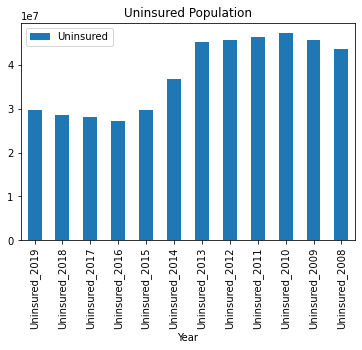

In [34]:
usa_uninsured2.plot.bar('Year','Uninsured')
plt.title('Uninsured Population')

In [35]:
# Graph by starting from 2008, therefore reverse the dataframe
usa_uninsured3 =usa_uninsured2.iloc[::-1]
usa_uninsured3

,Geographic Area,Year,Uninsured
11,United States,Uninsured_2008,43503000
10,United States,Uninsured_2009,45665000
9,United States,Uninsured_2010,47208000
8,United States,Uninsured_2011,46376000
7,United States,Uninsured_2012,45615000
6,United States,Uninsured_2013,45181000
5,United States,Uninsured_2014,36670000
4,United States,Uninsured_2015,29758000
3,United States,Uninsured_2016,27304000
2,United States,Uninsured_2017,28019000


Text(0.5, 1.0, 'Uninsured Population')

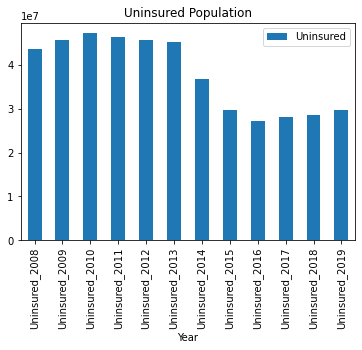

In [36]:
usa_uninsured3.plot.bar('Year','Uninsured')
plt.title('Uninsured Population')

In [37]:
# Merge the Population data for USA so that a average line plot can be added to the Graphical Presentation

# filter the population to the National level
pop_df = pop_2020.iloc[[0],:]

pop_df2 =  pd.melt(pop_df, 
                   id_vars='Geographic Area',
                   value_name='Population',
                    var_name='Year')
pop_df2['Year'] = pop_df2['Year'].str.replace('pop_','',regex=False)
pop_df2

,Geographic Area,Year,Population
0,United States,2010,309321666.0
1,United States,2011,311556874.0
2,United States,2012,313830990.0
3,United States,2013,315993715.0
4,United States,2014,318301008.0
5,United States,2015,320635163.0
6,United States,2016,322941311.0
7,United States,2017,324985539.0
8,United States,2018,326687501.0
9,United States,2019,328239523.0


In [38]:
pop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  11 non-null     object 
 1   Year             11 non-null     object 
 2   Population       11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 392.0+ bytes


In [39]:
usa_uninsured4 = usa_uninsured3
# Strip the Uninsured to get the appropriate Year
usa_uninsured4['Year']=usa_uninsured4['Year'].str.replace('Uninsured_','',regex=False)
usa_uninsured4


,Geographic Area,Year,Uninsured
11,United States,2008,43503000
10,United States,2009,45665000
9,United States,2010,47208000
8,United States,2011,46376000
7,United States,2012,45615000
6,United States,2013,45181000
5,United States,2014,36670000
4,United States,2015,29758000
3,United States,2016,27304000
2,United States,2017,28019000


In [40]:
usa_uninsured4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 11 to 0
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  12 non-null     object
 1   Year             12 non-null     object
 2   Uninsured        12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 420.0+ bytes


In [41]:
pop_df2 = pop_df2[['Year','Population']]
pop_df2
usa_uninsured5 = pd.merge(usa_uninsured4, pop_df2, how='left', on ='Year' )
usa_uninsured5

,Geographic Area,Year,Uninsured,Population
0,United States,2008,43503000,NaN
1,United States,2009,45665000,NaN
2,United States,2010,47208000,309321666.0
3,United States,2011,46376000,311556874.0
4,United States,2012,45615000,313830990.0
5,United States,2013,45181000,315993715.0
6,United States,2014,36670000,318301008.0
7,United States,2015,29758000,320635163.0
8,United States,2016,27304000,322941311.0
9,United States,2017,28019000,324985539.0


In [42]:
usa_uninsured5['uninsured_rate'] = round((usa_uninsured5['Uninsured']/usa_uninsured5['Population'])*100 ,2)
usa_uninsured5

,Geographic Area,Year,Uninsured,Population,uninsured_rate
0,United States,2008,43503000,NaN,NaN
1,United States,2009,45665000,NaN,NaN
2,United States,2010,47208000,309321666.0,15.26
3,United States,2011,46376000,311556874.0,14.89
4,United States,2012,45615000,313830990.0,14.53
5,United States,2013,45181000,315993715.0,14.30
6,United States,2014,36670000,318301008.0,11.52
7,United States,2015,29758000,320635163.0,9.28
8,United States,2016,27304000,322941311.0,8.45
9,United States,2017,28019000,324985539.0,8.62


Text(0.5, 1.0, 'Uninsured Population')

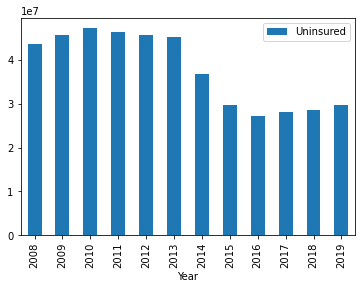

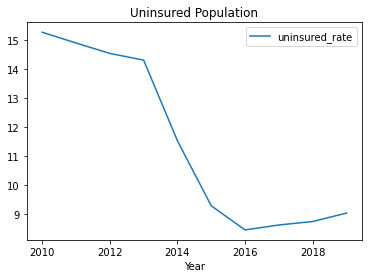

In [43]:
usa_uninsured5.plot.bar('Year','Uninsured')
usa_uninsured5.plot.line('Year','uninsured_rate')
plt.title('Uninsured Population')

#### How many people are uninsured?
After several years of coverage gains following the implementation of the ACA, the uninsured rate increased from 2017 to 2019 amid efforts to alter the availability and affordability of coverage

#### Merge the Uninsure Population and the Rate of Uninsured on one graph

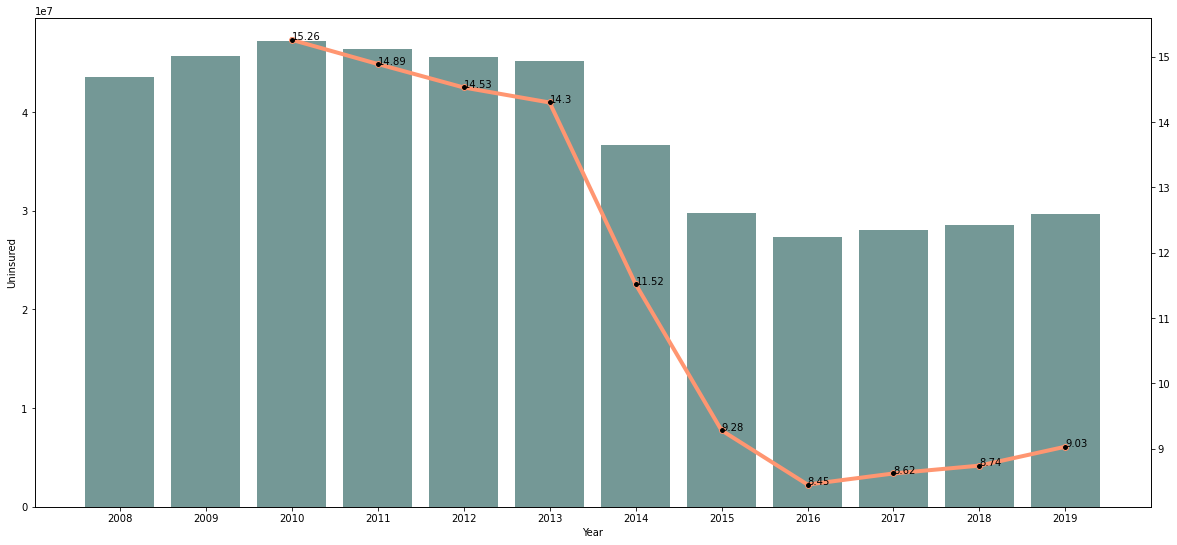

In [44]:
fig, ax1 = plt.subplots(figsize = (20,9))

ax1 = sns.barplot(x = "Year", 
                  y = "Uninsured", 
                  data = usa_uninsured5, 
                  color = '#0e5d59',
                  alpha = 0.6,
                  saturation = 0.75,
                  estimator = sum, 
                  ci = None, 
                  ax=ax1)

ax2 = ax1.twinx()

ax2.plot(ax1.get_xticks(), 
         usa_uninsured5['uninsured_rate'],
         color = '#ff9671',
         marker="o",
         markerfacecolor='black',
         linewidth = 4)

for i,j in usa_uninsured5.uninsured_rate.items():
    ax2.annotate(str(j), xy=(i, j))


#### Key Details:

When the major ACA coverage provisions went into effect in 2014, the number of uninsured and uninsured rate dropped dramatically and continued to fall through 2016 when just under 30 million people lacked coverage

The uninsured rate increased in 2019, continuing a steady upward climb that began in 2017. The uninsured rate in 2019 ticked up to 10.9% from 10.4% in 2018 and 10.0% in 2016, and the number of people who were uninsured in 2019 grew by more than one million from 2018 and by 2.2 million from 2016 (Figure 1). Despite these increases, the uninsured rate in 2019 remained significantly below pre-ACA levels.

In [45]:
unins_df2 = pd.read_excel('..\data\Insurance\Insurance 1999 to 2009.xls',skiprows = 1, sheet_name = 2)
#skiprows = 1,,header=[0, 1], ,
unins_df2.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
unins_df2.head()

,Geographic Area,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States:,50674000,46340000,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama:,789000,561000,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Alaska:,122000,133000,123000,109000,113000,107000,121000,117000,98000,114000,116000
3,Arizona:,1273000,1273000,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
4,Arkansas:,548000,505000,451000,521000,482000,441000,457000,431000,419000,367000,357000


In [46]:
list(unins_df2.columns.values)

['Geographic Area',
 2009,
 2008,
 2007,
 2006,
 2005,
 '2004',
 2003,
 2002,
 2001,
 '2000',
 '1999']

In [47]:
unins_df1.head()

,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000,28566000,28019000,27304000,29758000,36670000,45181000,45615000,46376000,47208000,45665000,43503000
1,Alabama,469000,481000,449000,435000,484000,579000,645000,632000,674000,687000,637000,609000
2,Alaska,86000,90000,98000,101000,106000,122000,132000,145000,141000,137000,143000,126000
3,Arizona,809000,750000,695000,681000,728000,903000,1118000,1131000,1095000,1065000,1127000,1154000
4,Arkansas,271000,244000,232000,232000,278000,343000,465000,476000,492000,501000,483000,480000


In [48]:
unins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  52 non-null     object
 1   Uninsured_2019   52 non-null     int64 
 2   Uninsured_2018   52 non-null     int64 
 3   Uninsured_2017   52 non-null     int64 
 4   Uninsured_2016   52 non-null     int64 
 5   Uninsured_2015   52 non-null     int64 
 6   Uninsured_2014   52 non-null     int64 
 7   Uninsured_2013   52 non-null     int64 
 8   Uninsured_2012   52 non-null     int64 
 9   Uninsured_2011   52 non-null     int64 
 10  Uninsured_2010   52 non-null     int64 
 11  Uninsured_2009   52 non-null     int64 
 12  Uninsured_2008   52 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 5.4+ KB


Based on the above to dataframes, we will drop year 2009 and 2008 from  unins_df2 where the data is continuing back to 1999 as it is the oldest file

In [49]:
unins_df3 = unins_df2.drop([2009,2008],axis=1)
unins_df3.head()
#We go into the dataframe for Geographic Area and drop the ':' so we can prepare it for merge
for state in 'Geographic Area':
    unins_df3['Geographic Area']= unins_df3['Geographic Area'].str.replace(':','',regex=False)

unins_df3.head()


,Geographic Area,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Alaska,123000,109000,113000,107000,121000,117000,98000,114000,116000
3,Arizona,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
4,Arkansas,451000,521000,482000,441000,457000,431000,419000,367000,357000


In [50]:


uninsured_pop= pd.merge(unins_df1, unins_df3, how='inner', on ='Geographic Area')
#uninsured_pop.rename(columns=lambda x: x.replace('Uninsured_', ''), inplace=True)
uninsured_pop.rename(columns={
                         'Uninsured_2019':'2019',
                         'Uninsured_2018':'2018',
                         'Uninsured_2017':'2017',
                         'Uninsured_2016':'2016',
                         'Uninsured_2015':'2015',
                         'Uninsured_2014':'2014',
                         'Uninsured_2013':'2013',
                         'Uninsured_2012':'2012',
                         'Uninsured_2011':'2011',
                         'Uninsured_2010':'2010',
                         'Uninsured_2009':'2009',
                         'Uninsured_2008':'2008',
                        },inplace=True)




uninsured_pop.to_csv(r'../clean_data_source/uninsured_pop.csv', index = False)
uninsured_pop.head()

,Geographic Area,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,29639000,28566000,28019000,27304000,29758000,36670000,45181000,45615000,46376000,...,43503000,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama,469000,481000,449000,435000,484000,579000,645000,632000,674000,...,609000,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Alaska,86000,90000,98000,101000,106000,122000,132000,145000,141000,...,126000,123000,109000,113000,107000,121000,117000,98000,114000,116000
3,Arizona,809000,750000,695000,681000,728000,903000,1118000,1131000,1095000,...,1154000,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
4,Arkansas,271000,244000,232000,232000,278000,343000,465000,476000,492000,...,480000,451000,521000,482000,441000,457000,431000,419000,367000,357000


#### Create a Transform data cells for the above Uninsured Data Set

In [51]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
uninsured_final = pd.melt(uninsured_pop, 
                         id_vars='Geographic Area',
                        value_name='Uninsured',
                        var_name='Year')
uninsured_final


,Geographic Area,Year,Uninsured
0,United States,2019,29639000
1,Alabama,2019,469000
2,Alaska,2019,86000
3,Arizona,2019,809000
4,Arkansas,2019,271000
...,...,...,...
1087,Virginia,1999,828000
1088,Washington,1999,757000
1089,West Virginia,1999,263000
1090,Wisconsin,1999,518000


### Create a Transform data cells for the population Data Set

In [52]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
population_final = pd.melt(population, 
                         id_vars='Geographic Area',
                        value_name='Population',
                        var_name='Year')
population_final
population_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  1176 non-null   object 
 1   Year             1176 non-null   object 
 2   Population       1132 non-null   float64
dtypes: float64(1), object(2)
memory usage: 27.7+ KB


#### Save the above two files to the External Drives

In [53]:
# Save the File Externally
#population_final.to_csv(r'../clean_data_source/population_final.csv', index = False)

#uninsured_final.to_csv(r'../clean_data_source/uninsured_final.csv', index = False)


#### Import the Uninsurance Data by Ethnicity

In [54]:
unins_ethnicity1 = pd.read_excel('..\data\Insurance\hic09acs_uninsured.xlsx',skiprows = 1, sheet_name = 1)

unins_ethnicity1.rename(columns={'Unnamed: 0':'Ethnicity'}, inplace=True)
# unins_ethnicity1.head()
unins_ethnicity1

,Ethnicity,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,All races,29639000,28566000,28019000,27304000,29758000,36670000,45181000,45615000,46376000,47208000,45665000
1,White,19365000,18637000,18201000,17767000,19478000,24083000,29638000,29991000,30450000,30913000,30110000
2,"White, not Hispanic",12131000,11725000,11503000,11144000,12247000,15686000,19815000,20156000,20731000,21202000,20963000
3,Black,4124000,4099000,4004000,3840000,4324000,5307000,6604000,6629000,6717000,6854000,6664000
4,American Indian and Alaska Native,531000,521000,513000,502000,523000,585000,662000,686000,686000,726000,699000
5,Asian,1218000,1157000,1201000,1185000,1343000,1757000,2329000,2321000,2303000,2305000,2028000
6,Native Hawaiian and other Pacific Islander,75000,65000,63000,58000,53000,74000,92000,95000,92000,86000,76000
7,Hispanic (any race),11135000,10588000,10345000,10224000,10879000,12801000,15107000,15164000,15277000,15484000,14776000


In [55]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
unins_ethnicity2 = pd.melt(unins_ethnicity1, 
                         id_vars='Ethnicity',
                        value_name='Uninsured',
                        var_name='Year')
unins_ethnicity2

,Ethnicity,Year,Uninsured
0,All races,2019,29639000
1,White,2019,19365000
2,"White, not Hispanic",2019,12131000
3,Black,2019,4124000
4,American Indian and Alaska Native,2019,531000
...,...,...,...
83,Black,2009,6664000
84,American Indian and Alaska Native,2009,699000
85,Asian,2009,2028000
86,Native Hawaiian and other Pacific Islander,2009,76000


In [56]:
# Save the File Externally
#unins_ethnicity2.to_csv(r'../clean_data_source/unins_ethnicity.csv', index = False)